Data Loaded and Sorted
Data Normalised
Prepared Train & Test Sets


/home/dhinesh-fedor/.local/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - loss: 1.9250e-04 - val_loss: 1.8368e-04
Epoch 2/5
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step - loss: 8.1709e-05 - val_loss: 1.2171e-04
Epoch 3/5
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step - loss: 7.7769e-05 - val_loss: 1.7266e-05
Epoch 4/5
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - loss: 7.4831e-05 - val_loss: 4.4931e-04
Epoch 5/5
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 79s 6ms/step - loss: 7.2938e-05 - val_loss: 6.3327e-05
6079/6079 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


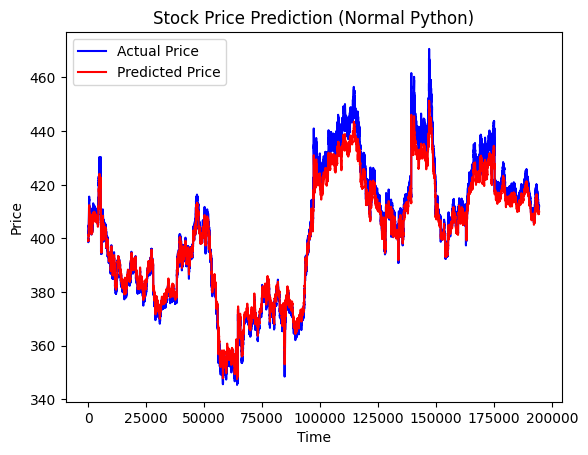

Execution Time (Normal Python): 413.94 seconds


In [9]:
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import pickle


# Start Timer
start_time = time.time()


# Read Data 
df = pd.read_csv("Dataset/ITC_minute.csv")

# convert to datetime
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y %H:%M")
df = df.sort_values("date")

pdf = df[['date', 'close']].copy()
pdf.set_index("date", inplace=True)

print("Data Loaded and Sorted")


# Normalisation
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(pdf[['close']])
print("Data Normalised")


# Sequence Creation
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# reshape for LSTM: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


# Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Prepared Train & Test Sets")


# LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


# Training
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=5, batch_size=64)


# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))


# Plotting
plt.plot(y_test_real, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Stock Price Prediction (Normal Python)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# Save Model + Scaler
model.save('itc_lstm_model_normal.keras')

with open('scaler_normal.pkl', 'wb') as f:
    pickle.dump(scaler, f)


# End Timer
end_time = time.time()
print(f"Execution Time (Normal Python): {end_time - start_time:.2f} seconds")


Data Loaded and Sorted
Data Normalised
Prepared Train & Test Sets


/home/dhinesh-fedor/.local/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 2.3073e-04 - val_loss: 2.4401e-05
Epoch 2/5
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 79s 6ms/step - loss: 8.2888e-05 - val_loss: 2.0315e-04
Epoch 3/5
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 79s 6ms/step - loss: 7.7441e-05 - val_loss: 8.8076e-05
Epoch 4/5
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 79s 6ms/step - loss: 7.6038e-05 - val_loss: 3.6348e-05
Epoch 5/5
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - loss: 7.3895e-05 - val_loss: 1.9669e-05
6079/6079 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


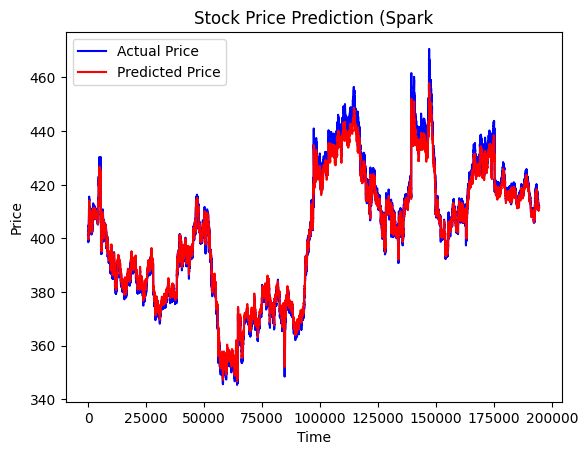

Total Execution Time with PySpark: 431.48 seconds


In [8]:
import time
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Start timer
start_time = time.time()

spark = SparkSession.builder.appName("ITC_Stock").getOrCreate()

# Read ITC data from HDFS
df = spark.read.csv("hdfs://localhost:9000/bigdata/itc/ITC_minute.csv", header=True, inferSchema=True)

from pyspark.sql.functions import col, to_timestamp

# convert date to proper timestamp
df = df.withColumn("date", to_timestamp(col("date"), "dd-MM-yyyy HH:mm")) \
       .orderBy("date")

pdf = df.select("date", "close").toPandas()
pdf.set_index("date", inplace=True)

print("Data Loaded and Sorted")

# Normalising Data
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(pdf[['close']])
print("Data Normalised")

# Sequence Creation
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Reshape for LSTM: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print("Prepared Train & Test Sets")

# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
# Training
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=5, batch_size=64, verbose=1)

# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))
y_test_real = scaler.inverse_transform(y_test.reshape(-1,1))

# Plotting
plt.plot(y_test_real, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Stock Price Prediction (Spark')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# Save model + scaler
model.save('itc_lstm_model_spark.keras')
import pickle
with open('scaler_spark.pkl', 'wb') as f:
    pickle.dump(scaler, f)


# End timer
end_time = time.time()
execution_time = end_time - start_time
print(f"Total Execution Time with PySpark: {execution_time:.2f} seconds")
